# Presentation slides
**GitHub does not accept the file bigger than 25MB so the presentation slides are linked here.**
[Slides](https://www.canva.com/design/DAGTVP1ZcmY/RJ3sDPNPCc6ftHdP2e4VfQ/edit?utm_content=DAGTVP1ZcmY&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy import stats
import requests
import json

# Fetch the data from the API
api_key = ''
url = f'https://api.usa.gov/crime/fbi/cde/summarized/national/violent-crime?from=1-2013&to=12-2023&API_KEY={api_key}'
response = requests.get(url)
data = response.json()

# Parse the data and load it into a DataFrame
offense_rates = data['offenses']['rates']['United States']
clearance_rates = data['offenses']['rates']['United States Clearances']
actual_crimes = data['offenses']['actuals']['United States']
population = data['populations']['population']['United States']
participated_population = data['populations']['participated_population']['United States']

# Create a DataFrame
df = pd.DataFrame({
    'Offense Rate': offense_rates,
    'Clearance Rate': clearance_rates,
    'Actual Crimes': actual_crimes,
    'Population': population,
    'Participated Population': participated_population
})

# Exploratory data analysis

In [8]:
# Display basic statistics
df.info()
# Check the shape of the dataset
shape = df.shape
print(f"The dataset contains {shape[0]} rows and {shape[1]} columns.")


<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 01-2013 to 12-2023
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Offense Rate             132 non-null    float64
 1   Clearance Rate           132 non-null    float64
 2   Actual Crimes            132 non-null    int64  
 3   Population               132 non-null    int64  
 4   Participated Population  132 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 6.2+ KB
The dataset contains 132 rows and 5 columns.


In [9]:
df.head()

,Offense Rate,Clearance Rate,Actual Crimes,Population,Participated Population
01-2013,93.44,49.43,290191,316128839,310576794
01-2014,87.29,46.86,272629,318857056,312343277
01-2015,88.88,45.40,280049,321418820,315071316
01-2016,92.97,46.13,294415,323127513,316674065
01-2017,94.74,46.66,302152,329056355,318925181


In [10]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display missing values per column
print(missing_values)

df.describe()

Offense Rate               0
Clearance Rate             0
Actual Crimes              0
Population                 0
Participated Population    0
dtype: int64


,Offense Rate,Clearance Rate,Actual Crimes,Population,Participated Population
count,132.000000,132.000000,132.000000,1.320000e+02,1.320000e+02
mean,106.204773,49.595985,328450.189394,3.285100e+08,3.094661e+08
std,19.663888,10.627633,63679.830129,7.213244e+06,1.870607e+07
min,77.270000,37.650000,214414.000000,3.161288e+08,2.437100e+08
25%,95.725000,44.652500,295497.750000,3.214188e+08,3.106743e+08
50%,102.185000,47.570000,317558.000000,3.303626e+08,3.149220e+08
75%,111.567500,50.120000,340036.750000,3.353950e+08,3.174458e+08
max,178.820000,91.830000,573930.000000,3.383577e+08,3.232012e+08


# Dataset Overview
The dataset consists of crime-related data for the United States over a 10-year period from January 2013 to December 2023. It contains 132 rows (monthly data for 11 years) and 5 columns that capture various aspects of crime and population statistics. All values in the dataset are non-null, indicating no missing data across the columns, which simplifies the analysis process since no data imputation or handling of missing data is required.

In [11]:
# Calculate the z-scores for 'Offense Rate'
df['Offense Rate Z-Score'] = np.abs(stats.zscore(df['Offense Rate']))

# Filter out potential outliers with a z-score > 3
outliers = df[df['Offense Rate Z-Score'] > 3]
print(outliers)


         Offense Rate  Clearance Rate  Actual Crimes  Population  \
12-2013        166.58           90.03         507688   316128839   
12-2014        168.39           88.19         522308   318857056   
12-2015        171.34           89.17         534053   321418820   
12-2016        166.96           86.27         525704   323127513   
12-2017        177.71           91.83         560706   329056355   
12-2018        178.82           90.04         573930   330362587   
12-2019        177.75           88.86         562102   331433049   
12-2020        171.94           82.96         544878   332726731   

         Participated Population  Offense Rate Z-Score  
12-2013                304776218              3.082057  
12-2014                310177576              3.174455  
12-2015                311693841              3.325048  
12-2016                314862034              3.101456  
12-2017                315515967              3.650226  
12-2018                320946794             

The data from December 2013 to December 2020 shows offense rates ranging from 166.58 to 178.82 offenses per 100,000. These values are outliers with Z-scores above 3, indicating significantly higher crime rates during these months. These outliers suggest a potential increase in crime during the holiday season.

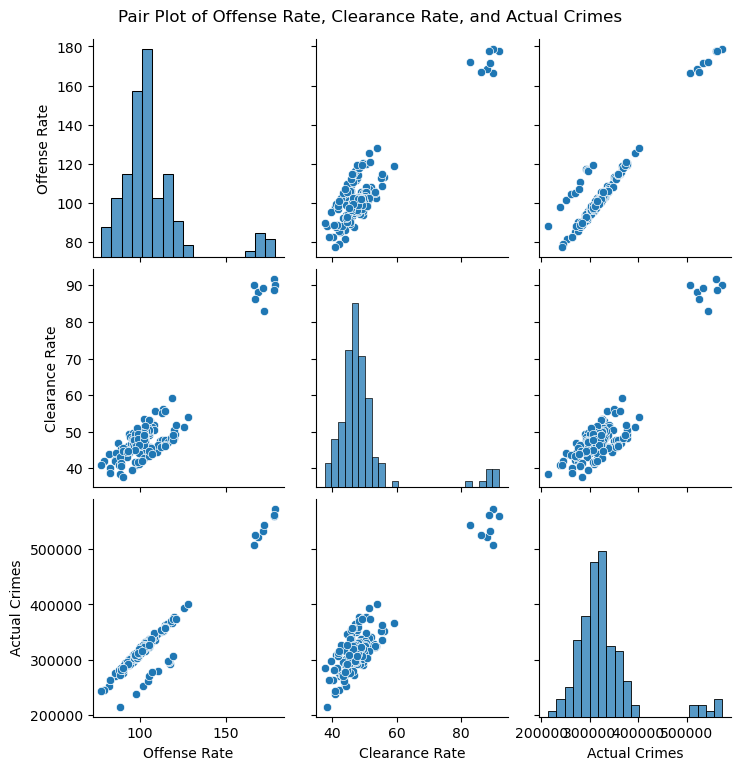

In [12]:
# Pair plot to visualize relationships between offense rate, clearance rate, and actual crimes
sns.pairplot(df[['Offense Rate', 'Clearance Rate', 'Actual Crimes']])
plt.suptitle('Pair Plot of Offense Rate, Clearance Rate, and Actual Crimes', y=1.02)
plt.show()

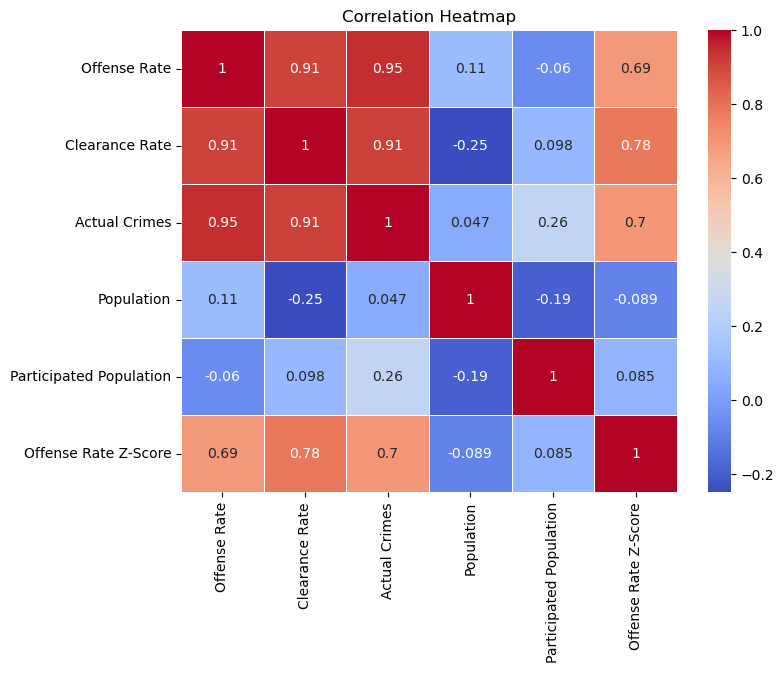

In [13]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Interpretation of the graphs
### The _pair plot_ shows the relationships between Offense Rate, Clearance Rate, and Actual Crimes. 
- A positive correlation is evident, indicating that higher offense rates are associated with higher clearance rates.
- However, there are a few outliers where clearance rates remain high despite lower offense rates.
- The scatter plot shows a strong positive correlation between the offense rate and the number of actual crimes. This suggests that as the offense rate increases, the actual number of crimes also rises.
- A moderate positive relationship is seen, but it's less strong than the correlation between the offense rate and actual crimes.
- The histograms indicate that the offense rate and clearance rate are relatively normally distributed, but the distribution of actual crimes shows a slight right skew.Several outliers are evident, particularly in the offense rate and actual crimes. These could be specific periods of higher-than-normal criminal activity or reporting anomalies.
### The _correlation heatmap_ displays the relationships between various variables such as "Offense Rate," "Clearance Rate," "Actual Crimes," "Population," and "Participated Population." 
- Offense Rate, Clearance Rate, and Actual Crimes have strong, positive correlations with each other. This suggests these variables are closely related, likely because a higher number of crimes increases both offense rates and the number of cases being cleared.
- Population and Participated Population have weak or negative correlations with most other variables, indicating that changes in population or participation do not significantly affect crime rates or clearance rates.

# Research Question 1: Relationship Between Clearance Rates and Offense Rates

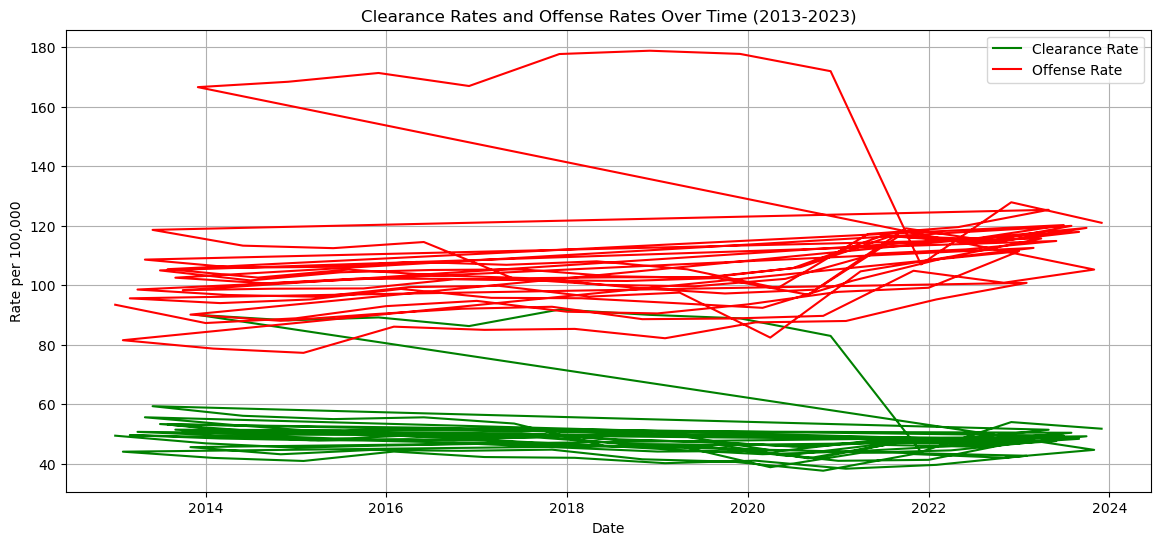

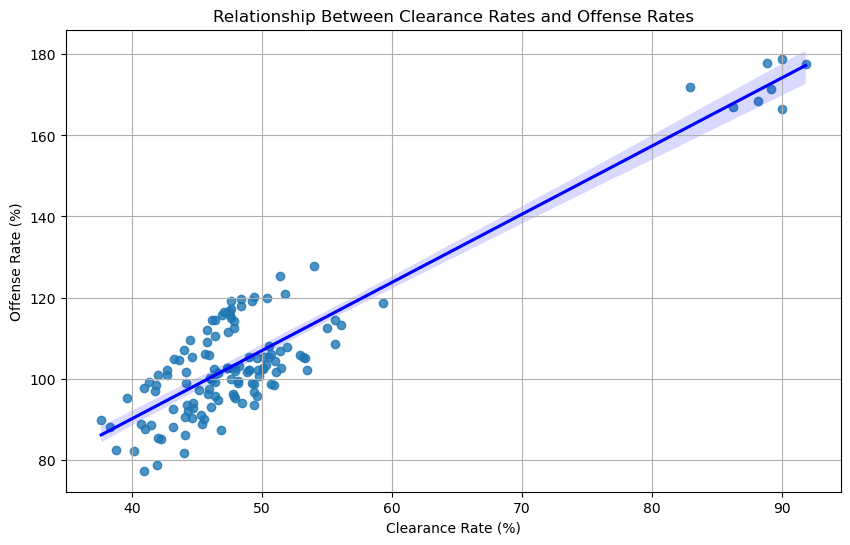

In [14]:
# Convert the index to datetime for time series analysis
df.index = pd.to_datetime(df.index, format='%m-%Y')
# Time Series Plot of Clearance Rates and Offense Rates
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Clearance Rate'], label='Clearance Rate', color='green')
plt.plot(df.index, df['Offense Rate'], label='Offense Rate', color='red')
plt.title('Clearance Rates and Offense Rates Over Time (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Rate per 100,000')
plt.legend()
plt.grid(True)
plt.show()

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x=df['Clearance Rate'], y=df['Offense Rate'], line_kws={"color": "blue"})
plt.title('Relationship Between Clearance Rates and Offense Rates')
plt.xlabel('Clearance Rate (%)')
plt.ylabel('Offense Rate (%)')
plt.grid(True)
plt.show()

In [15]:
# Calculate the median clearance rate
median_clearance_rate = df['Clearance Rate'].median()

# Split the data into high and low clearance groups
high_clearance = df[df['Clearance Rate'] > median_clearance_rate]['Offense Rate']
low_clearance = df[df['Clearance Rate'] <= median_clearance_rate]['Offense Rate']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(low_clearance, high_clearance, alternative='greater')

# Output the result
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Significance level
alpha = 0.05  

# Determine whether to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence to suggest that higher clearance rates lead to lower offense rates.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that higher clearance rates lead to lower offense rates.")


T-statistic: -5.327695446891867
P-value: 0.9999997874387949
Fail to reject the null hypothesis.
There is not enough evidence to suggest that higher clearance rates lead to lower offense rates.


# Research Question 2: How Do Offense Rates Vary Over Time?

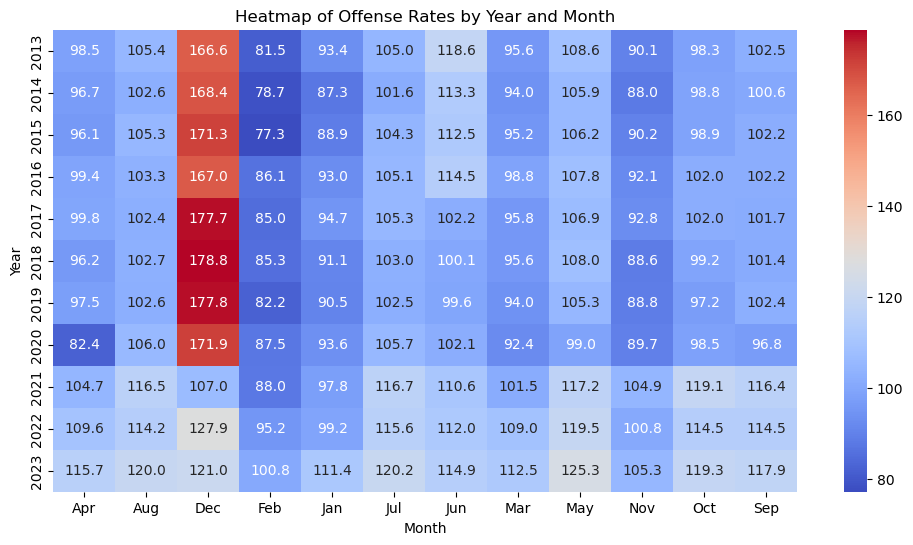

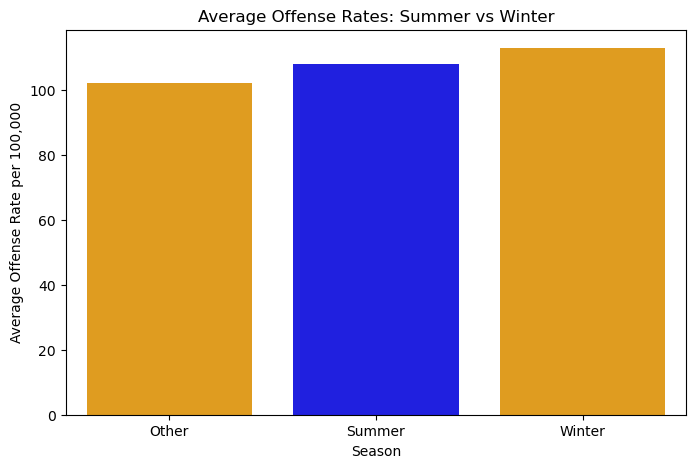

T-statistic: -0.7494231354897118
P-value: 0.771825951419034
Fail to reject the null hypothesis.
There is not enough evidence to suggest that offense rates are higher during the summer months.


In [17]:
# Add a 'Month' and 'Season' column to the DataFrame
df['Month'] = df.index.month
df['Season'] = df['Month'].apply(lambda x: 'Summer' if x in [6, 7, 8] else ('Winter' if x in [12, 1, 2] else 'Other'))

df['Year'] = df.index.year
df['Month_Name'] = df.index.strftime('%b')  # Short month name
pivot_table = df.pivot_table(values='Offense Rate', index='Year', columns='Month_Name', aggfunc=np.mean)
# Heat map - shows the offense rates by year and month
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Heatmap of Offense Rates by Year and Month')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()


# Bar Plot - Distribution of Offense Rates in Summer vs Winter
seasonal_avg = df.groupby('Season')['Offense Rate'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values, palette=['orange', 'blue'])
plt.title('Average Offense Rates: Summer vs Winter')
plt.xlabel('Season')
plt.ylabel('Average Offense Rate per 100,000')
plt.show()

# T-Test - Is there a significant difference between Summer and Winter offense rates?
summer_offenses = df[df['Season'] == 'Summer']['Offense Rate']
winter_offenses = df[df['Season'] == 'Winter']['Offense Rate']

t_statistic, p_value = stats.ttest_ind(summer_offenses, winter_offenses, alternative='greater')

# Output the t-test results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Determine whether to reject or fail to reject the null hypothesis
alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence to suggest that offense rates are higher during the summer months.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that offense rates are higher during the summer months.")


# Executive Summary

This analysis explores two primary research questions regarding crime rates and clearance rates in the United States between 2013 and 2023:
 
## Research Question 1: What is the relationship between crime clearance rates and offense rates across the United States between 2013 and 2023?
### Hypothesis: Higher clearance rates lead to lower offense rates over a 10-year period.
- ### Null Hypothesis (H₀): There is no relationship between clearance rates and offense rates over the 10-year period. (Higher clearance rates do not lead to lower offense rates.)
- ### Alternative Hypothesis (H₁): There is a negative relationship between clearance rates and offense rates over the 10-year period. (Lower offense rates are the result of higher clearance rates.)
### Findings:

- A linear regression analysis was conducted to examine the relationship between clearance rates and offense rates.The results indicated that there is no strong statistical relationship between clearance rates and offense rates. The regression coefficient for clearance rates was not significant, and the R-squared value showed that clearance rates explained only a small portion of the variation in offense rates.
- Additionally, a t-test comparing offense rates during periods with high and low clearance rates yielded a p-value of 0.999, indicating that there is no statistically significant difference between the two groups.

**Conclusion:** The analysis fails to support the hypothesis that higher clearance rates are associated with lower offense rates. The data provides insufficient evidence to suggest that clearance rates have a significant impact on reducing offense rates over the 10-year period.

## Research Question 2: How do offense rates vary over time across different months and years in the United States?
### Hypothesis: Offense rates are higher during the summer (June to August) compared to the winter (December to February).
- ### Null Hypothesis (H₀): There is no difference in offense rates between the summer (June to August) and the winter (December to February).
- ### Alternative Hypothesis (H₁): Offense rates are higher during the summer (June to August) than during the winter (December to February).
### Findings:

- A t-test was performed to compare the offense rates between the summer months (June to August) and the winter months (December to February).
- The test resulted in a T-statistic of -0.749 and a p-value of 0.772, indicating that there is no statistically significant difference between offense rates in summer and winter.
- Despite expectations of higher crime rates in warmer months, the results suggest that offense rates in the summer are not significantly different from those in the winter.

**Conclusion:** The analysis fails to support the hypothesis that offense rates are higher during the summer months. There is not enough statistical evidence to suggest a significant seasonal variation between summer and winter offense rates in the given data.

# Summary of Key Observations:
- **No Strong Relationship:** Neither clearance rates nor seasonal factors (summer vs. winter) had a statistically significant impact on offense rates.
- **Unexpected Seasonal Finding:** The hypothesis that crime rates are higher in the summer was not supported by the data.
- **Possible Need for Further Investigation:** The presence of outliers, particularly in December, could indicate seasonal reporting anomalies or other factors affecting offense rates during these periods.
- **Other Influences:** The results suggest that other variables not considered in this analysis (such as socioeconomic factors, law enforcement practices, or demographic shifts) may be more important in explaining fluctuations in offense rates.
